In [1]:
# Setup

import tensorflow as tf
import os
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from math import sqrt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# supress warnings
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Bangkit/Dataset/newAllDataset.csv', header=0, index_col=0, parse_dates=True)
series_harga = df['Bayam']
df

,Bayam,Kangkung,Sawi,Brokoli,Kubis,Wortel,Kentang,Kacang Polong,Kacang Tanah,Buncis,...,Lada,Cengkeh,Kayu Manis,Kapulaga,Kunyit,Ubi Jalar,Ubi Kayu,Kentang.1,Singkong,Talas
Tanggal,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1500,1000,5500,9000,3500,8000,6000,30000,26000,17000,...,89000,130000,17000,83000,3500,3000,4000,2000,1000,14000
2013-08-01,1500,1000,5500,9000,3500,8000,6000,30000,26000,17000,...,89000,130000,17000,83000,3500,3000,4000,2000,1000,14000
2013-01-15,1500,1000,5500,9000,3500,8000,6000,30000,26000,16000,...,89000,130000,17000,83000,3500,3000,4000,2000,1000,14000
2013-01-22,1500,1000,5500,9000,3500,8000,6000,30000,26000,16000,...,89000,130000,17000,83000,3500,3000,4000,2000,1000,14000
2013-01-29,1500,1000,5500,9000,3500,8000,6000,30000,26000,16000,...,89000,130000,17000,83000,3500,3000,4000,2000,1000,14000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-30,11500,11000,7000,38000,13500,13000,18000,57000,27500,35000,...,125500,180000,23000,82000,9500,9000,5500,5000,2000,22000
2023-07-07,12000,11500,6000,38000,15000,18000,18000,57000,28000,35000,...,125500,180000,23000,82000,9500,9000,5500,5000,2000,22000
2023-07-14,12000,11500,6000,38000,15000,18000,18000,57000,28000,35000,...,125500,180000,23000,82000,9500,9000,5500,5000,2000,22000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 553 entries, 2013-01-01 to 2023-07-28
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Bayam                 553 non-null    int64  
 1   Kangkung              553 non-null    int64  
 2   Sawi                  553 non-null    int64  
 3   Brokoli               553 non-null    int64  
 4   Kubis                 553 non-null    int64  
 5   Wortel                553 non-null    int64  
 6   Kentang               553 non-null    int64  
 7   Kacang Polong         553 non-null    int64  
 8   Kacang Tanah          553 non-null    int64  
 9   Buncis                553 non-null    int64  
 10  Labu Siam             553 non-null    int64  
 11  Labu Kuning           553 non-null    int64  
 12  Lobak Merah           553 non-null    int64  
 13  Lobak Putih           553 non-null    int64  
 14  Tomat                 553 non-null    int64  
 15  Tero

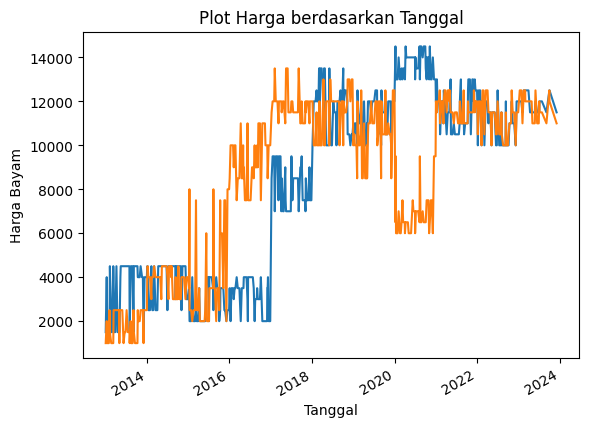

In [7]:
# plt.figure(figsize=(10, 6))
# plt.plot(series, label='Harga')
harga_kangkung = df['Kangkung']
plt.title('Plot Harga berdasarkan Tanggal')
plt.xlabel('Tanggal')
plt.ylabel('Harga Bayam')
# plt.legend()
# plt.show()
series_harga.plot();
harga_kangkung.plot();

In [8]:
# Fungsi untuk Membentuk Data untuk Model
def df_to_X_y(df, window_size=75):
    df_as_np = df.to_numpy()
    X = []
    y = []

    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [9]:
# Normalisasi Data
mean_value = series_harga.mean()
std_value = series_harga.std()
normalized_series = (series_harga - mean_value) / std_value
#deret waktu rata rata 0 standar deviasi 1
#nilai seragam dan lebih kecil

In [10]:
WINDOW_SIZE = 5
X, y = df_to_X_y(normalized_series, WINDOW_SIZE)
X.shape, y.shape

((548, 5, 1), (548,))

In [11]:
# Pembagian Data menjadi Train, Validation, dan Test sets
X_train, y_train = X[:500], y[:500]
X_val, y_val = X[500:520], y[500:520]
X_test, y_test = X[520:], y[520:]

# Inisialisasi scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalisasi X_train
X_train = scaler.fit_transform(X_train.reshape(-1, WINDOW_SIZE))

# Normalisasi X_val
X_val = scaler.transform(X_val.reshape(-1, WINDOW_SIZE))

# Normalisasi X_test
X_test = scaler.transform(X_test.reshape(-1, WINDOW_SIZE))

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((500, 5), (500,), (20, 5), (20,), (28, 5), (28,))

In [12]:
# Arsitektur Model LSTM
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(WINDOW_SIZE, 1)),
    tf.keras.layers.LSTM(64, return_sequences='True'),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 64)             16896     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 29585 (115.57 KB)
Trainable params: 29585 (115.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# Kompilasi dan Pelatihan Model dengan Normalisasi
checkpoint = tf.keras.callbacks.ModelCheckpoint('model/', save_best_only=True)
model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

model.fit(X_train,
          y_train,
          validation_data=(X_val, y_val),
          epochs=1000,  # Sesuaikan jumlah epoch sesuai kebutuhan
          callbacks=[checkpoint])

Epoch 1/1000
16/16 [==============================] - 18s 599ms/step - loss: 0.0711 - root_mean_squared_error: 0.2666 - val_loss: 0.0225 - val_root_mean_squared_error: 0.1499
Epoch 2/1000
16/16 [==============================] - 0s 19ms/step - loss: 0.0686 - root_mean_squared_error: 0.2618 - val_loss: 0.0266 - val_root_mean_squared_error: 0.1632
Epoch 3/1000
16/16 [==============================] - 0s 20ms/step - loss: 0.0663 - root_mean_squared_error: 0.2575 - val_loss: 0.0257 - val_root_mean_squared_error: 0.1604
Epoch 4/1000
16/16 [==============================] - 0s 18ms/step - loss: 0.0653 - root_mean_squared_error: 0.2555 - val_loss: 0.0230 - val_root_mean_squared_error: 0.1518
Epoch 5/1000
16/16 [==============================] - 8s 500ms/step - loss: 0.0642 - root_mean_squared_error: 0.2533 - val_loss: 0.0175 - val_root_mean_squared_error: 0.1323
Epoch 6/1000
16/16 [==============================] - 0s 12ms/step - loss: 0.0628 - root_mean_squared_error: 0.2506 - val_loss: 0.01

In [15]:
# Pemuatan Model Terbaik
model = tf.keras.models.load_model('model/')

16/16 [==============================] - 1s 3ms/step


<Axes: title={'center': 'Training Set Predictions vs Actuals'}>

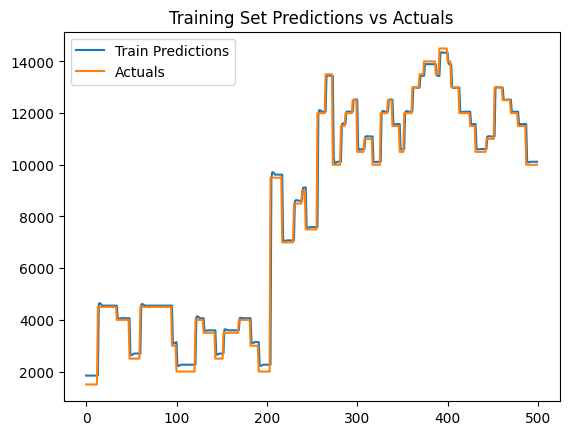

In [16]:
# Visualisasi Hasil Pelatihan pada Data Training
train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions': train_predictions * std_value + mean_value, 'Actuals': y_train * std_value + mean_value})
train_results.plot(title='Training Set Predictions vs Actuals')

1/1 [==============================] - 0s 39ms/step


<Axes: title={'center': 'Validation Set Predictions vs Actuals'}>

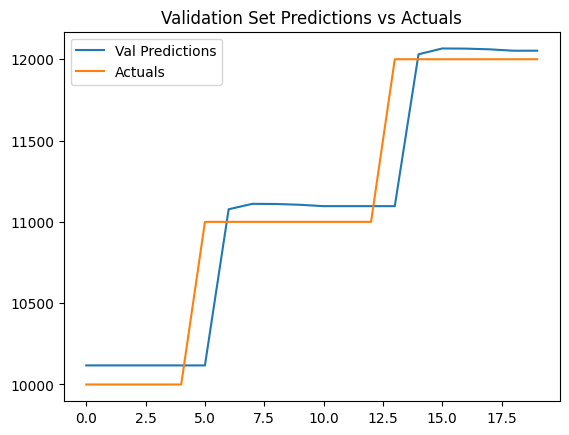

In [17]:
# Visualisasi Hasil Pelatihan pada Data Validasi
val_predictions = model.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions': val_predictions * std_value + mean_value, 'Actuals': y_val * std_value + mean_value})
val_results.plot(title='Validation Set Predictions vs Actuals')

In [18]:
# Visualisasi Hasil Prediksi pada Data Test
test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions': test_predictions * std_value + mean_value, 'Actuals': y_test * std_value + mean_value})

# Tampilkan Tabel Hasil Prediksi
print(test_results)

1/1 [==============================] - 0s 23ms/step
    Test Predictions  Actuals
0       12052.515625  12000.0
1       12052.515625  12000.0
2       12052.515625  12500.0
3       12507.795898  12500.0
4       12527.839844  12500.0
5       12527.698242  12500.0
6       12525.615234  12500.0
7       12521.421875  12500.0
8       12521.421875  12500.0
9       12521.421875  12500.0
10      12521.421875  12500.0
11      12521.421875  11500.0
12      11609.594727  11500.0
13      11564.242188  11500.0
14      11564.302734  11500.0
15      11568.902344  11500.0
16      11577.571289  11500.0
17      11577.571289  11500.0
18      11577.571289  11500.0
19      11577.571289  11500.0
20      11577.571289  11500.0
21      11577.571289  11500.0
22      11577.571289  11500.0
23      11577.571289  11500.0
24      11577.571289  12000.0
25      12040.157227  12000.0
26      12059.292969  12000.0
27      12058.973633  12000.0


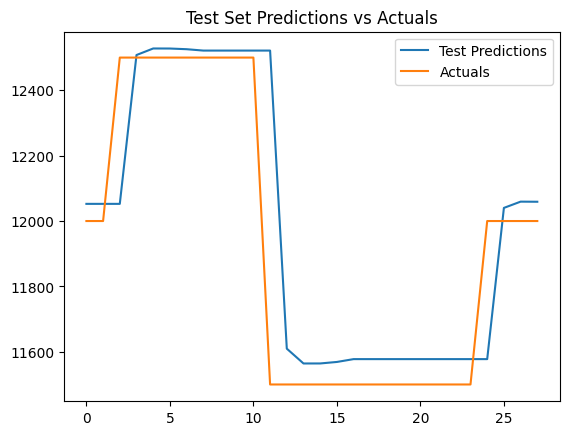

In [19]:
test_results.plot(title='Test Set Predictions vs Actuals')
plt.show()

1/1 [==============================] - 0s 205ms/step


<Axes: title={'center': 'Test Set Predictions vs Actuals'}>

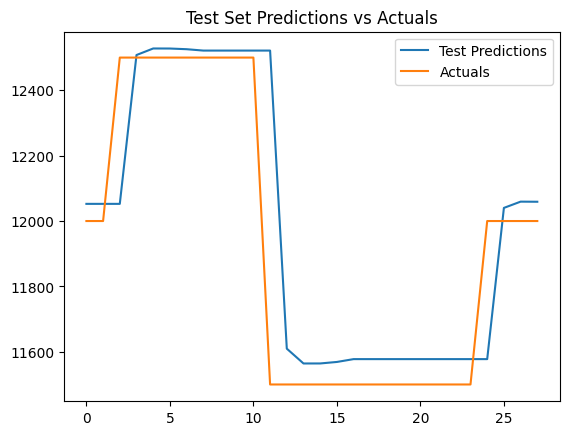

In [20]:
# Visualisasi Hasil Prediksi pada Data Test
test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions': test_predictions * std_value + mean_value, 'Actuals': y_test * std_value + mean_value})
test_results.plot(title='Test Set Predictions vs Actuals')